In [51]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [52]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/home/bee110493/.config/JetBrains/DataSpell2021.3/projects/meal-recommender/app/fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/home/bee110493/.config/JetBrains/DataSpell2021.3/projects/meal-recommender/app/fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/home/bee110493/.config/JetBrains/DataSpell2021.3/projects/meal-recommender/app/fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


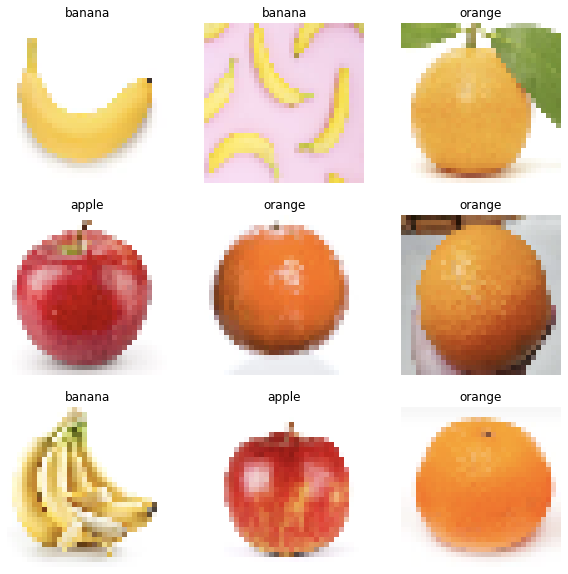

In [53]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [54]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [55]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [56]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
23/23 [==============================] - 2s 52ms/step - loss: 0.9710 - accuracy: 0.5152 - val_loss: 0.8797 - val_accuracy: 0.6818
Epoch 2/10
23/23 [==============================] - 1s 46ms/step - loss: 0.6604 - accuracy: 0.7370 - val_loss: 0.5379 - val_accuracy: 0.7727
Epoch 3/10
23/23 [==============================] - 2s 50ms/step - loss: 0.3729 - accuracy: 0.8804 - val_loss: 0.4755 - val_accuracy: 0.8182
Epoch 4/10
23/23 [==============================] - 2s 59ms/step - loss: 0.2180 - accuracy: 0.9370 - val_loss: 0.1792 - val_accuracy: 0.9242
Epoch 5/10
23/23 [==============================] - 1s 44ms/step - loss: 0.2280 - accuracy: 0.9217 - val_loss: 0.4472 - val_accuracy: 0.8333
Epoch 6/10
23/23 [==============================] - 1s 46ms/step - loss: 0.2139 - accuracy: 0.9130 - val_loss: 0.1726 - val_accuracy: 0.9545
Epoch 7/10
23/23 [==============================] - 1s 44ms/step - loss: 0.1320 - accuracy: 0.9630 - val_loss: 0.2261 - val_accuracy: 0.9091
Epoch 8/10
23

In [57]:
model.evaluate(test_ds)

7/7 [==============================] - 0s 5ms/step - loss: 0.3090 - accuracy: 0.9077


[0.3089959919452667, 0.9076923131942749]

In [58]:
model.save("model_name")

INFO:tensorflow:Assets written to: model_name/assets


INFO:tensorflow:Assets written to: model_name/assets


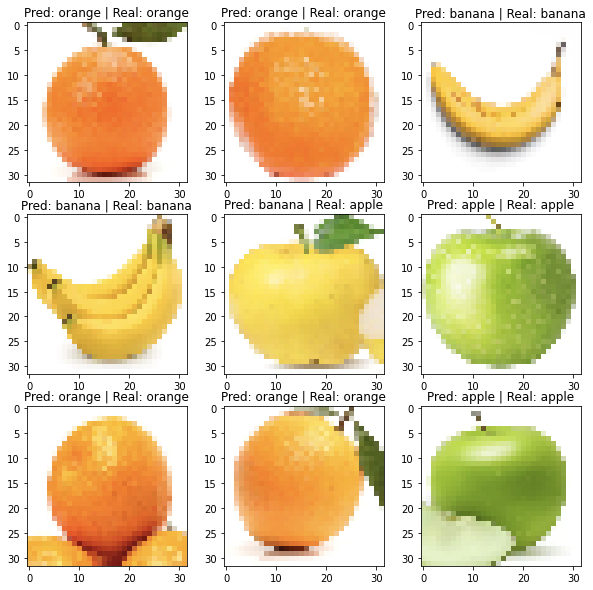

In [59]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [60]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp06opu28_/assets


INFO:tensorflow:Assets written to: /tmp/tmp06opu28_/assets
2022-04-13 23:31:13.931474: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-04-13 23:31:13.931505: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-04-13 23:31:13.931668: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmp06opu28_
2022-04-13 23:31:13.933837: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-04-13 23:31:13.933864: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmp06opu28_
2022-04-13 23:31:13.943261: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-04-13 23:31:14.018868: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmp06opu28_
2022-04-13 23:31:14.045038: I tensorflow/cc/saved_model/loader.cc:301] SavedModel

In [61]:
!pwd

/home/bee110493/.config/JetBrains/DataSpell2021.3/projects/meal


In [62]:
!ls

model_name  model.tflite  Sample.ipynb	Tutorial.ipynb
